In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # for the subplots

import pandas as pd
import seaborn as sns

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('jpg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

In [16]:
# Data citation: Akbilgic, Oguz. (2013). ISTANBUL STOCK EXCHANGE. UCI Machine Learning Repository.
# data source website: https://archive-beta.ics.uci.edu/ml/datasets/istanbul+stock+exchange

# import the data from your own CSV file
file_path = "./data_akbilgic.csv"
data = pd.read_csv(file_path, index_col=0)

data

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
16-Feb-11,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
17-Feb-11,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
18-Feb-11,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938


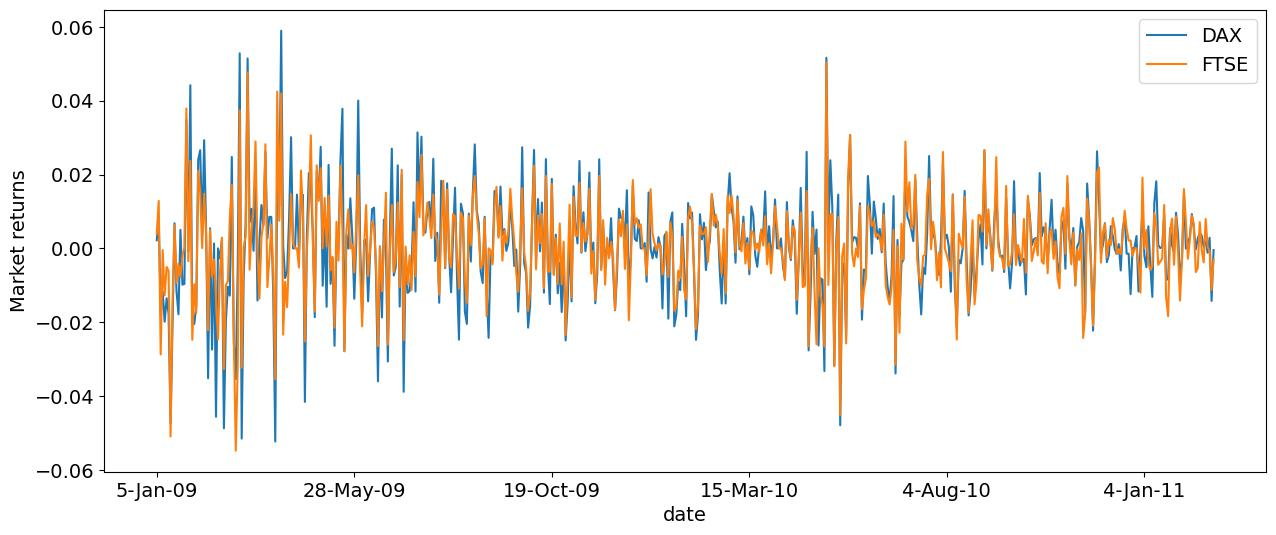

In [17]:
# Selecting only DAX and FTSE columns
selected_data = data[['DAX', 'FTSE']]

# Plotting the selected columns
selected_data.plot(figsize=(15, 6), ylabel='Market returns')
plt.show()

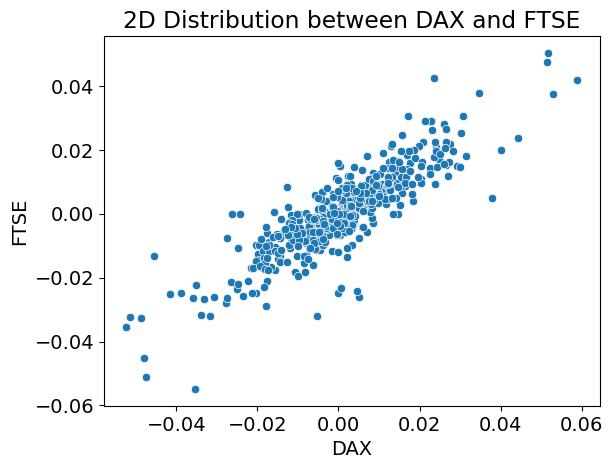

In [18]:
# Selecting only DAX and FTSE columns
selected_data = data[['DAX', 'FTSE']]

# Creating a scatterplot between DAX and FTSE
sns.scatterplot(data=selected_data, x='DAX', y='FTSE')
plt.xlabel('DAX')
plt.ylabel('FTSE')
plt.title('2D Distribution between DAX and FTSE')
plt.show()

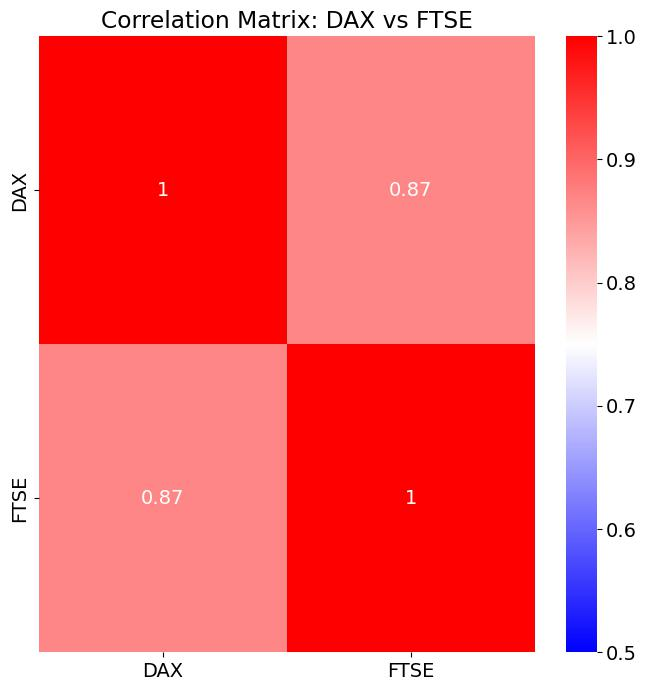

In [19]:
# Selecting only DAX and FTSE columns for correlation matrix
selected_corr = data[['DAX', 'FTSE']].corr()

# Plotting the correlation matrix between DAX and FTSE
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(selected_corr, vmin=0.5, vmax=1, annot=True, cmap='bwr')
plt.title('Correlation Matrix: DAX vs FTSE')
plt.show()

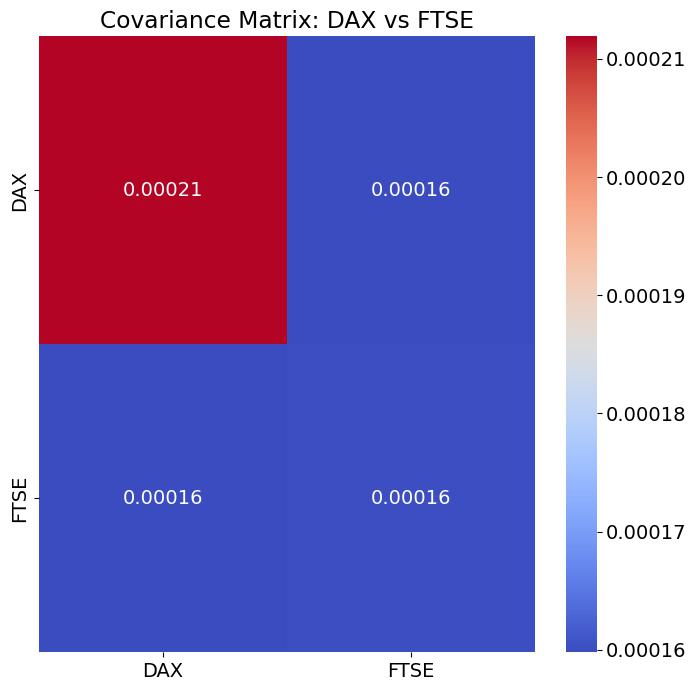

In [20]:
# Calculate covariance matrix for DAX and FTSE columns
covariance_matrix = data[['DAX', 'FTSE']].cov()

# Plotting the covariance matrix heatmap
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix: DAX vs FTSE')
plt.savefig('Figure_15_03c.png', dpi=300)
plt.show()

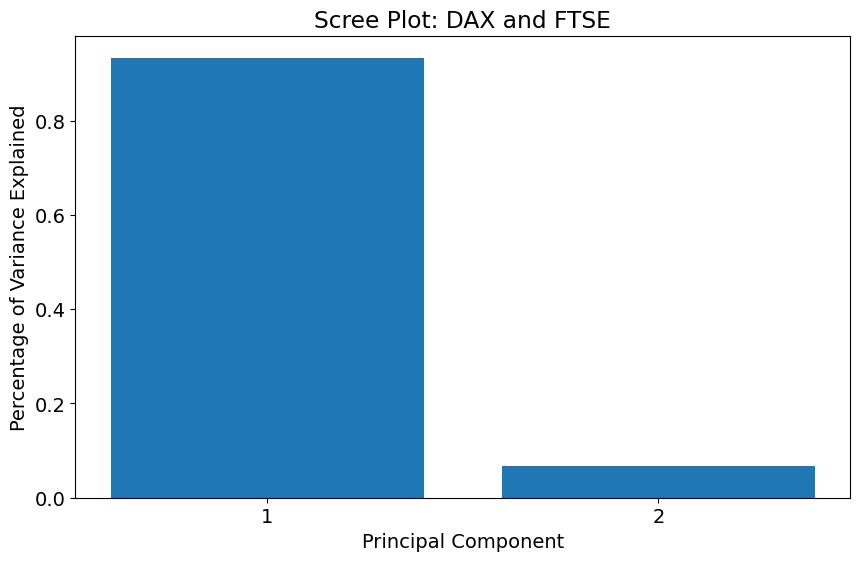

In [21]:
from sklearn.decomposition import PCA

# Selecting only DAX and FTSE columns for PCA
selected_pca_data = data[['DAX', 'FTSE']]

# Standardizing the data (optional, but often recommended)
selected_pca_data_standardized = (selected_pca_data - selected_pca_data.mean()) / selected_pca_data.std()

# 1. Eigendecomposition
covariance_matrix = np.cov(selected_pca_data_standardized, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# 2. Sorting the results
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# 3. Calculating component scores
component_scores = np.dot(selected_pca_data_standardized, eigenvectors_sorted)

# 4. Eigenvalues to %var
explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)

# 5. Showing scree plot
plt.figure(figsize=(10, 6))

# Bar plot for explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, align='center')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.title('Scree Plot: DAX and FTSE')
plt.savefig('Figure_15_03d.png', dpi=300)
plt.show()

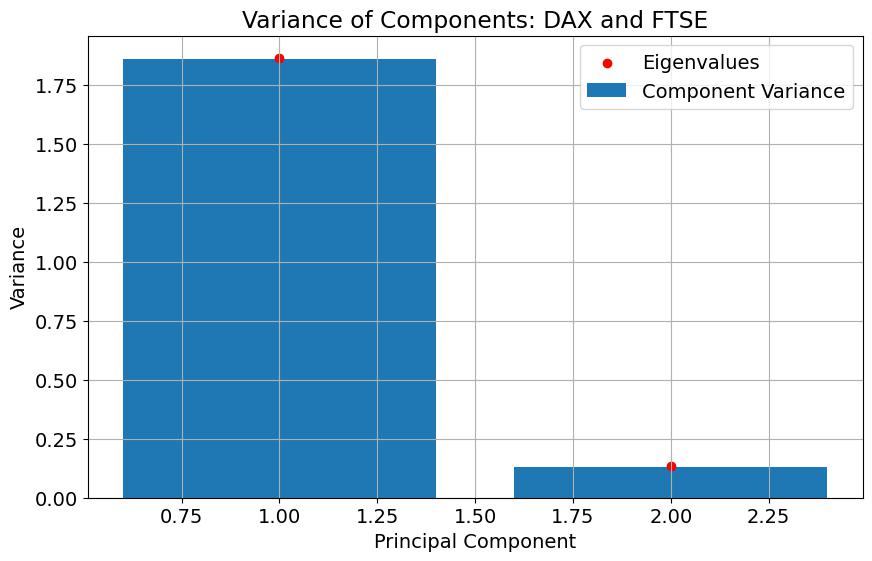

In [22]:
# Calculate variance of the components
component_variance = np.var(component_scores, axis=0)

# Plotting variance of components and eigenvalues
plt.figure(figsize=(10, 6))

# Bar plot for variance of components
plt.bar(range(1, len(component_variance) + 1), component_variance, align='center', label='Component Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.title('Variance of Components: DAX and FTSE')

# Scatter plot for eigenvalues
plt.scatter(range(1, len(eigenvalues_sorted) + 1), eigenvalues_sorted, color='red', label='Eigenvalues')
plt.legend()
plt.grid(True)
plt.savefig('Figure_15_03e.png', dpi=300)
plt.show()


In [23]:
# Print variance of components
print("Variance of Components:")
for i, var in enumerate(component_variance):
    print(f"Component {i+1}: {var:.4f}")

# Print eigenvalues
print("\nEigenvalues:")
for i, eig_val in enumerate(eigenvalues_sorted):
    print(f"Eigenvalue {i+1}: {eig_val:.4f}")

Variance of Components:
Component 1: 1.8639
Component 2: 0.1324

Eigenvalues:
Eigenvalue 1: 1.8674
Eigenvalue 2: 0.1326


In [24]:
# Calculate correlation between 'DAX' and 'FTSE'
correlation = data[['DAX', 'FTSE']].corr()

# Display correlation as text
print(f"Correlation between 'DAX' and 'FTSE': {correlation.iloc[0, 1]:.4f}")

Correlation between 'DAX' and 'FTSE': 0.8674


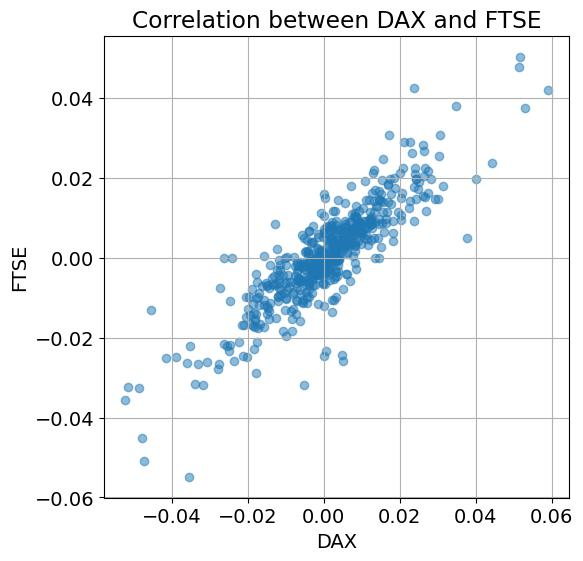

In [25]:
# Creating a scatterplot to visualize the correlation
plt.figure(figsize=(6, 6))
plt.scatter(data['DAX'], data['FTSE'], alpha=0.5)
plt.xlabel('DAX')
plt.ylabel('FTSE')
plt.title('Correlation between DAX and FTSE')
plt.grid(True)
plt.savefig('Correlation_DAX_FTSE.png', dpi=300)
plt.show()

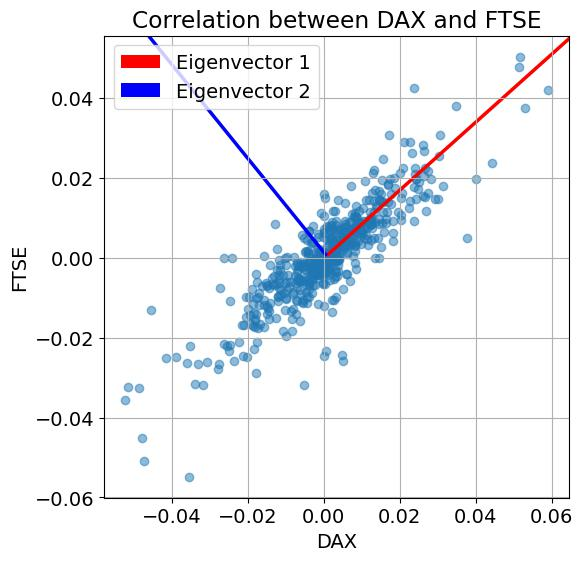

In [26]:
# Calculate covariance matrix for 'DAX' and 'FTSE'
covariance_matrix = np.cov(data['DAX'], data['FTSE'], rowvar=False)

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Scatterplot to visualize the correlation between 'DAX' and 'FTSE'
plt.figure(figsize=(6, 6))
plt.scatter(data['DAX'], data['FTSE'], alpha=0.5)
plt.xlabel('DAX')
plt.ylabel('FTSE')
plt.title('Correlation between DAX and FTSE')
plt.grid(True)

# Plot eigenvectors as arrows
plt.quiver(np.mean(data['DAX']), np.mean(data['FTSE']), eigenvectors[0, 0], eigenvectors[1, 0],
           angles='xy', scale_units='xy', scale=3, color='red', label='Eigenvector 1')
plt.quiver(np.mean(data['DAX']), np.mean(data['FTSE']), eigenvectors[0, 1], eigenvectors[1, 1],
           angles='xy', scale_units='xy', scale=3, color='blue', label='Eigenvector 2')
plt.legend()

plt.savefig('Eigenvectors_on_Scatterplot.png', dpi=300)
plt.show()

In [27]:
# Calculate covariance matrix for 'DAX' and 'FTSE'
covariance_matrix = np.cov(data['DAX'], data['FTSE'], rowvar=False)

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Display eigenvectors as text
print("Eigenvectors:")
for i in range(len(eigenvectors)):
    print(f"Eigenvector {i+1}: [{eigenvectors[0, i]:.4f}, {eigenvectors[1, i]:.4f}]")


Eigenvectors:
Eigenvector 1: [0.7615, 0.6481]
Eigenvector 2: [-0.6481, 0.7615]
